
## 🧾 Introducción al problema: Clasificación de Tumores de Mama

En esta clase vamos a introducirnos al problema de **clasificación binaria**, un tipo de tarea de aprendizaje supervisado donde el objetivo es predecir una de dos posibles clases. Para esto, utilizaremos un conjunto de datos real y clásico en Machine Learning: el **Breast Cancer Wisconsin Diagnostic Dataset**, incluido en la librería `scikit-learn`.

---

### 🎯 Objetivo del problema

Dado un conjunto de mediciones obtenidas de imágenes digitales de masas tumorales en el seno de pacientes, el objetivo es **predecir si el tumor es benigno (no canceroso) o maligno (canceroso)**. La predicción se hace en base a 30 variables numéricas extraídas automáticamente de imágenes digitalizadas de biopsias.

Esta es una **tarea típica en aplicaciones médicas**, donde se busca asistir el diagnóstico humano con herramientas automáticas.

---

### 📦 Descripción del dataset

El dataset contiene un total de **569 muestras** (filas) y **30 características numéricas** (columnas), además de la variable objetivo (`target`) que indica el tipo de tumor:

* `target = 0`: tumor **maligno**
* `target = 1`: tumor **benigno**

Las columnas del dataset representan **características estadísticas** calculadas sobre la forma, textura y otros aspectos de los núcleos celulares detectados en una imagen de tejido:

#### Algunas de las columnas principales:

* `mean radius`, `mean texture`, `mean perimeter`, `mean area`, `mean smoothness`: medidas promedio de tamaño, forma y textura.
* `radius error`, `perimeter error`, etc.: errores estándar de las medidas anteriores.
* `worst radius`, `worst texture`, `worst area`, etc.: el valor máximo observado en una región específica.

En total, hay 10 características base (como `radius`, `texture`, `area`, etc.), y para cada una de ellas se calculan tres estadísticas:

* Media (`mean`)
* Error estándar (`error`)
* Valor máximo (`worst`)

Esto da lugar a las 30 variables predictoras.

---

### 📈 Qué aprenderemos hoy

* Cómo abordar un problema de **clasificación** usando modelos que ya conocemos (por ejemplo, `RandomForestClassifier`).
* Cómo **entrenar** y **evaluar** un modelo de clasificación binaria.
* Cómo usar **métricas específicas** para clasificación:

  * `Accuracy` (exactitud): qué porcentaje de ejemplos se clasificaron correctamente.
  * `Precision` y `Recall`: para evaluar la calidad de las predicciones clase por clase.
  * `F1-Score`: medida equilibrada entre precisión y recall.
  * `Matriz de confusión`: herramienta visual para ver cuántos aciertos y errores hay por clase.
* Cómo visualizar la **importancia de las variables** en el modelo final.

---

Este ejemplo es ideal para mostrar cómo los mismos pasos que usamos en regresión (entrenamiento, test, predicción, evaluación) también se aplican en clasificación, cambiando el tipo de salida esperada.


Dimensiones de X: (569, 30)
primeras filas de X:    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radiu

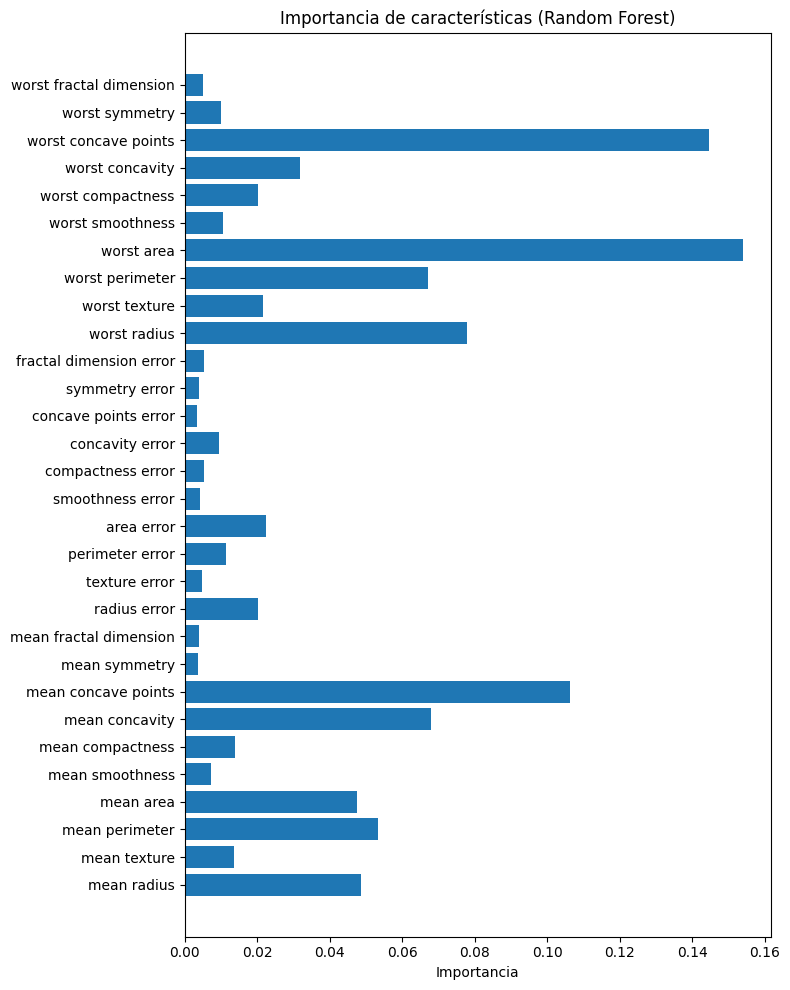

In [1]:
# Paso 1: Carga de datos y exploración inicial
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")  # 0 = maligno, 1 = benigno

print("Dimensiones de X:", X.shape)
print("primeras filas de X:", X.head())
print("Distribución de clases:\n", y.value_counts())

# Paso 2: División en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenamiento del modelo
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Paso 4: Predicción y evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Paso 5: Importancia de características
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(8, 10))
plt.barh(feat_names, importances)
plt.title("Importancia de características (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


## 🧪 Interpretación de los resultados

Luego de entrenar el modelo y hacer predicciones sobre los datos de prueba, evaluamos su rendimiento con métricas específicas para clasificación. Analicemos los resultados obtenidos:

---

### 🔳 Matriz de confusión

```plaintext
[[40  3]
 [ 1 70]]
```

Esta matriz compara las **clases reales** con las **predichas** por el modelo. Su forma es:

|                    | Predicho = 0 | Predicho = 1 |
| ------------------ | ------------ | ------------ |
| Real = 0 (maligno) | 40           | 3            |
| Real = 1 (benigno) | 1            | 70           |

#### Interpretación:

* **Verdaderos negativos (TN)**: 40 → Tumores malignos correctamente clasificados como malignos.
* **Falsos positivos (FP)**: 3 → Tumores malignos mal clasificados como benignos.
* **Falsos negativos (FN)**: 1 → Tumores benignos mal clasificados como malignos.
* **Verdaderos positivos (TP)**: 70 → Tumores benignos correctamente clasificados.

👉 En un contexto médico, **minimizar los falsos negativos y falsos positivos es crucial**, ya que un error podría llevar a un diagnóstico incorrecto.

---

### 📊 Métricas de clasificación

```plaintext
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71
```

Estas métricas se interpretan así:

* **Precision (precisión)**: De todos los que el modelo dijo que son de una clase, ¿cuántos lo son realmente?

  * Para clase 0 (malignos): 0.98
  * Para clase 1 (benignos): 0.96

* **Recall (sensibilidad)**: De todos los que realmente son de una clase, ¿cuántos fueron detectados correctamente?

  * Para clase 0: 0.93
  * Para clase 1: 0.99

* **F1-score**: Promedio armónico entre precisión y recall. Sirve como medida general de equilibrio entre ambas.

  * Muy alto en ambas clases (0.95 y 0.97), lo que indica un rendimiento robusto.

---

### 📌 Accuracy general

```plaintext
Accuracy: 0.9649
```

El modelo acertó en **96.5%** de los casos. Es una métrica global que da una primera idea del rendimiento, pero puede ocultar desequilibrios entre clases (por eso también miramos `precision` y `recall`).

---

### 🧠 Conclusión general

El modelo de **Random Forest** logró un desempeño excelente para este problema de clasificación binaria. Clasificó correctamente la mayoría de los tumores benignos y malignos, con muy pocos errores críticos. Esto demuestra que los modelos de clasificación supervisada pueden ser herramientas poderosas en aplicaciones médicas si se entrenan y evalúan correctamente.

---



## 📌 Importancia de las características (Random Forest)

El gráfico muestra qué tan importantes son las distintas variables del dataset en la toma de decisiones del modelo **Random Forest** para clasificar los tumores.

Cada barra representa el **peso relativo** que una característica tuvo al momento de dividir los datos en los árboles de decisión que componen el bosque aleatorio. Cuanto más larga la barra, mayor fue su contribución al modelo.

---

### 🔍 Observaciones destacadas:

1. **Las características más importantes fueron:**

   * `worst area`
   * `worst concave points`
   * `mean concave points`
   * `worst radius`
   * `mean concavity`
   * `mean perimeter`

   Estas variables se refieren a mediciones sobre el tamaño, la forma y la textura del tumor, especialmente aquellas asociadas a sus valores más extremos (`worst`) o promedios (`mean`).

2. **¿Qué significa esto?**

   * Por ejemplo, `worst area` indica el área máxima observada en el tumor (mayor valor medido en las imágenes). El modelo detecta que es una señal clara para distinguir entre tumores benignos y malignos.
   * `concave points` hace referencia a la cantidad de puntos cóncavos en los bordes del tumor: una forma más irregular suele estar asociada a tumores malignos.

3. **Otras características como errores o medidas de simetría tienen muy poca influencia**, lo que indica que no aportan tanta información diferenciadora para este modelo en particular.

---

### 📘 Conclusión:

Este tipo de análisis es muy útil porque:

* Nos permite **entender cómo piensa el modelo**.
* Ayuda a **reducir la dimensionalidad** del dataset en futuros experimentos (usando solo las variables más importantes).
* Es una herramienta clave en proyectos reales para justificar decisiones ante equipos médicos o profesionales de otras áreas.
